<a href="https://colab.research.google.com/github/leandrolazaro/Asymmetrical_traveler_postman-TP2-AEDS1-UFV/blob/master/cenipa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira

Nosso trabalho consiste em uma análise de dados acerca de ocorrências aeronaúticas no território brasileiro. Os dados escolhidos foram obtidos através do site dados.gov.br e o dataset se chama "CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira". Logo abaixo estão as questões a serem respondidas por esta análise de dados.


1.  Qual é o tipo de ocorrência mais comum? <br />
2.  Que tipo de ocorrência está mais associado a fatalidades? <br />
3.  O que poderia ser feito para evitar outras ocorrências? <br />
4.  Existe uma relação entre a fase de operação e fatalidades? <br />
5.  Existe uma relação entre a fabricante da aeronave e o tipo de ocorrência? <br />
6.  Existe uma relação entre o modelo da aeronave e o tipo de ocorrência? <br />
7.  Existe uma relação entre o fator contribuinte e o tipo de ocorrência? <br />
8.  Existe algum componente das aeronaves que está associado com os acidentes? <br />
9.  Existe alguma região associada com um elevado número de acidentes? <br />
10. Quais os acidentes mais frequentes por região do país? <br />
11. O horário possui relação com os acidentes? <br />
12. Qual a relação entre o tipo de aeronave e a frequência dos acidentes? <br />
13. Qual a relação entre tipo de acidente e a fatalidade? <br />
14. Qual a frequência de acidentes em relação aos meses? <br />
15. A quantidade de acidentes aumentou o diminuiu ao longo dos anos observados? <br />
16. A quantidade de fatalidades aumentou o diminuiu ao longo dos anos observados? <br />
17. Qual a porcentagem de acidente que possuem fatalidades? <br />
18. Qual a porcentagem de acidentes por operação particular, regular e taxi áereo? <br />
19. Qual as fases de operação com maior taxa de acidentes? <br />
20. Qual a taxa de acidentes em relação ao ano de fabricação das aeronaves? <br />

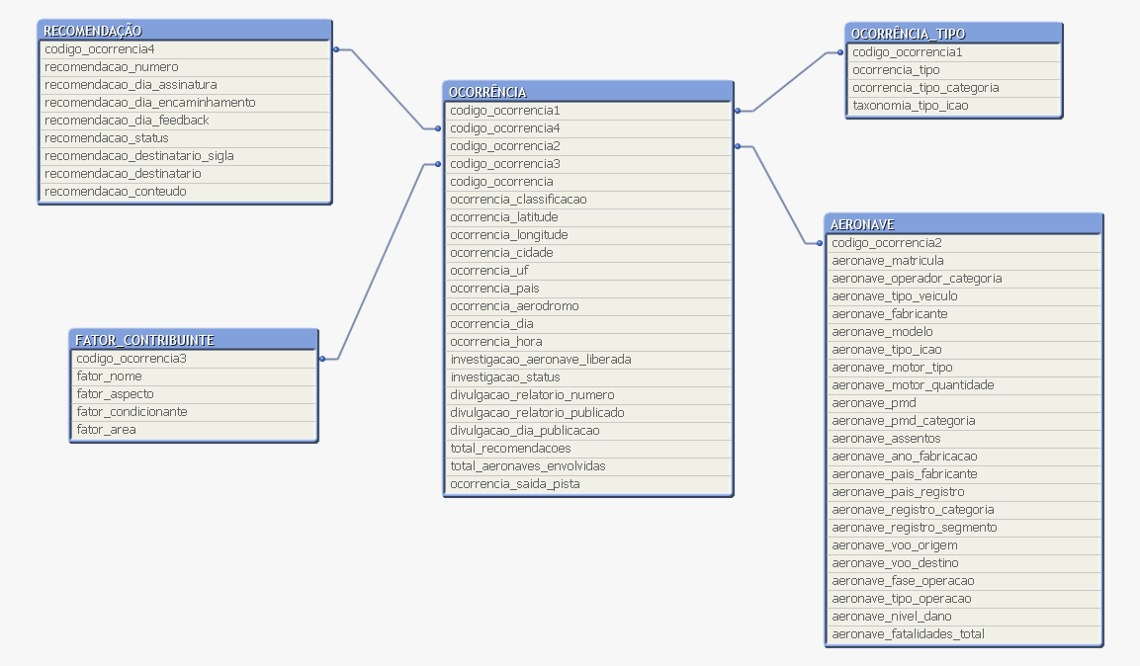

In [80]:
!mkdir -p dados
!wget https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/ocorrencia.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/ocorrencia_tipo.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/aeronave.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/fator_contribuinte.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/recomendacao.csv -P dados
!pip install pandas
!pip install matplotlib
!pip install seaborn

--2022-07-24 21:08:15--  https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/ocorrencia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 788905 (770K) [text/plain]
Saving to: ‘dados/ocorrencia.csv.1’

ocorrencia.csv.1    100%[===================>] 770.42K  --.-KB/s    in 0.006s  

2022-07-24 21:08:15 (124 MB/s) - ‘dados/ocorrencia.csv.1’ saved [788905/788905]

--2022-07-24 21:08:15--  https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/ocorrencia_tipo.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 445524 (435K) [text/plain]
Saving to: ‘dados/ocorrencia_tipo.csv.1’

ocorrenci

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df_ocorrencia = pd.read_csv("dados/ocorrencia.csv", sep=";")
df_ocorrencia_tipo = pd.read_csv("dados/ocorrencia_tipo.csv", sep=";")
df_aeronave = pd.read_csv("dados/aeronave.csv", sep=";")
df_fator_contribuinte = pd.read_csv("dados/fator_contribuinte.csv", sep=";")
df_recomendacao = pd.read_csv("dados/recomendacao.csv", sep=";")

In [83]:
df_ocorrencia

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,80458,80458,80458,80458,ACIDENTE,-17.999194,-51.642861,JATAÍ,GO,...,30/12/2021,20:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
5163,80452,80452,80452,80452,80452,ACIDENTE,-22.585556,-50.753889,MARACAÍ,SP,...,31/12/2021,09:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
5164,80457,80457,80457,80457,80457,INCIDENTE GRAVE,-29.695833,-51.081667,NOVO HAMBURGO,RS,...,31/12/2021,11:59:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5165,80460,80460,80460,80460,80460,INCIDENTE,-25.403333,-49.233611,CURITIBA,PR,...,31/12/2021,15:12:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [84]:
df_ocorrencia_tipo

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT
...,...,...,...,...
5342,80461,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5343,80463,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5344,80465,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
5345,80467,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


In [85]:
df_aeronave

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0
1,45332,PTUDD,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,PTGOO,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,PRMHX,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,PTUEW,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,80463,PRHMB,***,AVIÃO,CIRRUS DESIGN,SR22,SR22,PISTÃO,MONOMOTOR,1542,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,ANGRA DOS REIS,SÍLVIO NAME JÚNIOR,CRUZEIRO,PRIVADA,NENHUM,0
5231,80465,PRYRW,***,***,***,***,***,***,***,0,...,BRASIL,BRASIL,***,REGULAR,DEPUTADO LUÍS EDUARDO MAGALHÃES,SANTOS DUMONT,CRUZEIRO,REGULAR,NENHUM,0
5232,80467,PRGXM,***,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,...,BRASIL,BRASIL,AVIÃO,REGULAR,ORLANDO BEZERRA DE MENEZES,GOVERNADOR ANDRÉ FRANCO MONTORO,SUBIDA,REGULAR,LEVE,0
5233,80468,PRGIH,***,AVIÃO,BOEING COMPANY,737-76N,B737,JATO,BIMOTOR,70080,...,BRASIL,BRASIL,AVIÃO,REGULAR,SANTOS DUMONT,DEPUTADO LUÍS EDUARDO MAGALHÃES,TÁXI,REGULAR,NENHUM,0


In [86]:
df_fator_contribuinte

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO
...,...,...,...,...,...
3459,79713,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3460,79729,OUTRO FATOR,OUTRO,***,OUTRO
3461,80073,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL
3462,80258,INFRAESTRUTURA AEROPORTUÁRIA,INFRAESTRUTURA AEROPORTUÁRIA,***,FATOR OPERACIONAL


In [87]:
df_recomendacao

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,45331,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,45331,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,A-582/CENIPA/2014 - 03,2016-07-29,2016-08-25,NaN,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
3,45392,A-032/CENIPA/2014 - RSV 001,2014-04-07,2015-04-14,2015-08-21,Divulgar aos operadores de helicópteros vincul...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,45392,A-032/CENIPA/2014 - RSV 002,2014-04-07,2015-04-14,2015-08-17,Tendo em vista os fatos levantados nesta inves...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...,...
1192,79713,A-146/CENIPA/2020 - 02,2021-07-08,2021-07-26,NaN,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1193,79713,A-146/CENIPA/2020 - 03,2021-07-08,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1194,80073,A-063/CENIPA/2021 - 01,2021-11-12,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1195,80073,A-063/CENIPA/2021 - 02,2021-11-12,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


## Limpeza e Ajuste dos dados

### Removendo codigos de ocorrência redundantes

Nessa parte fizemos a remoção de chaves estrangeiras redundates que estavam contidas em cada um dos arquivos csv

In [88]:
df_ocorrencia_tipo.rename(columns={"codigo_ocorrencia1": "codigo_ocorrencia"}, inplace=True)
df_aeronave.rename(columns={"codigo_ocorrencia2": "codigo_ocorrencia"}, inplace=True)
df_fator_contribuinte.rename(columns={"codigo_ocorrencia3": "codigo_ocorrencia"}, inplace=True)
df_recomendacao.rename(columns={"codigo_ocorrencia4": "codigo_ocorrencia"}, inplace=True)
df_ocorrencia.drop(
    columns=[
        "codigo_ocorrencia1",
        "codigo_ocorrencia2",
        "codigo_ocorrencia3",
        "codigo_ocorrencia4",
    ],
    inplace=True,
)

Aqui foi realizada a junção dos 5 datasets

In [89]:
df_merged = pd.merge(df_ocorrencia, df_aeronave, on='codigo_ocorrencia',how='inner')
df_merged = pd.merge(df_merged, df_ocorrencia_tipo, on='codigo_ocorrencia',how='inner')
df_merged = pd.merge(df_merged, df_fator_contribuinte, on='codigo_ocorrencia',how='inner')

df_merged = pd.merge(df_merged, df_recomendacao, on='codigo_ocorrencia',how='inner')

# df_merged['ocorrencia_hora']=pd.to_datetime(df_merged['ocorrencia_hora'])

#df_merged['hora'] = df_merged['ocorrencia_hora'].dt.strftime('%H')

Foram retiradas todas as ocorrências indesejadas no dataset, como os asteríscos

In [90]:
df_merged.replace(['***', '****', '*****', '####'],None, inplace=True)
df_merged.fillna(method='ffill', inplace=True)

Alguns campos como longitude e latitude continham a string \t. Utilizamos a função replace para fazer essa limpeza.

In [91]:
for COLUMN in ['ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'ocorrencia_saida_pista', 'aeronave_matricula', 'aeronave_operador_categoria', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pais_fabricante', 'aeronave_pais_registro', 'aeronave_registro_categoria', 'aeronave_registro_segmento', 'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'taxonomia_tipo_icao', 'fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomendacao_conteudo', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'recomendacao_destinatario']:
  df_merged[COLUMN] = df_merged[COLUMN].map(lambda x: x.strip().replace(r'\t', ''))

Os campos de data e hora estavam separados, então agrupamos em apenas um

In [92]:
df_merged['ocorrencia_data'] = pd.to_datetime(df_merged['ocorrencia_dia'] + ' ' + df_merged['ocorrencia_hora'], format='%d/%m/%Y %H:%M:%S')

### Mudando o tipo da coluna ocorrencia_dia de object para datatime.

In [93]:
df_ocorrencia['ocorrencia_dia'] = pd.to_datetime(df_ocorrencia['ocorrencia_dia'], infer_datetime_format=True)

### Adiciona as colunas mes_acidente e ano_acidente ao DataFrame

In [94]:
df_ocorrencia['mes_acidente'] = df_ocorrencia['ocorrencia_dia'].map(lambda x: x.month)
df_ocorrencia['ano_acidente'] = df_ocorrencia['ocorrencia_dia'].map(lambda x: x.year)
# df_ocorrencia.info()
df_ocorrencia

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,mes_acidente,ano_acidente
0,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,SBPA,2012-05-01,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO,5,2012
1,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,2012-06-01,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO,6,2012
2,45333,ACIDENTE,***,***,VIAMÃO,RS,BRASIL,****,2012-06-01,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO,6,2012
3,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,BRASIL,****,2012-06-01,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,6,2012
4,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,BRASIL,****,2012-06-01,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,ACIDENTE,-17.999194,-51.642861,JATAÍ,GO,BRASIL,####,2021-12-30,20:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO,12,2021
5163,80452,ACIDENTE,-22.585556,-50.753889,MARACAÍ,SP,BRASIL,*****,2021-12-31,09:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO,12,2021
5164,80457,INCIDENTE GRAVE,-29.695833,-51.081667,NOVO HAMBURGO,RS,BRASIL,SSNH,2021-12-31,11:59:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,12,2021
5165,80460,INCIDENTE,-25.403333,-49.233611,CURITIBA,PR,BRASIL,SBBI,2021-12-31,15:12:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,12,2021


## Estatisticas

In [95]:
df_ocorrencia.describe()

,codigo_ocorrencia,total_recomendacoes,total_aeronaves_envolvidas,mes_acidente,ano_acidente
count,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000
mean,64008.273660,0.231662,1.013160,6.450552,2016.269208
std,13765.727151,0.842137,0.118959,3.469326,3.014757
min,45331.000000,0.000000,1.000000,1.000000,2012.000000
25%,50978.500000,0.000000,1.000000,3.000000,2013.000000
50%,65530.000000,0.000000,1.000000,6.000000,2016.000000
75%,78832.500000,0.000000,1.000000,9.000000,2019.000000
max,80468.000000,13.000000,3.000000,12.000000,2021.000000


In [96]:
df_ocorrencia_tipo.describe()

,codigo_ocorrencia
count,5347.000000
mean,64275.604825
std,13819.687471
min,45331.000000
25%,50997.000000
50%,65794.000000
75%,78897.500000
max,80468.000000


In [97]:
df_aeronave.describe()

,codigo_ocorrencia,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
count,5235.000000,5235.000000,5235.000000,5041.000000,5035.000000,5235.000000
mean,64041.763133,14746.441261,14746.441261,27.364213,1874.565243,0.146705
std,13758.316315,34043.322658,34043.322658,54.397346,489.485904,0.651463
min,45331.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50991.500000,1157.000000,1157.000000,2.000000,1978.000000,0.000000
50%,65546.000000,1997.000000,1997.000000,6.000000,1993.000000,0.000000
75%,78832.500000,5670.000000,5670.000000,10.000000,2008.000000,0.000000
max,80468.000000,396895.000000,396895.000000,384.000000,9999.000000,10.000000


In [98]:
df_fator_contribuinte.describe()

,codigo_ocorrencia
count,3464.000000
mean,59892.391744
std,12684.935855
min,45331.000000
25%,49797.750000
50%,53325.000000
75%,77441.000000
max,80258.000000


In [99]:
df_recomendacao.describe()

,codigo_ocorrencia
count,1197.000000
mean,61619.240602
std,13157.488485
min,45331.000000
25%,50095.000000
50%,53571.000000
75%,77726.000000
max,80258.000000


Analisando as estatisticas do método describe, é notável que esse banco de dados possuí poucos dados quantitativos úteis. Apenas total_aeronaves_envolvidas, aeronave_assentos, aeronave_ano_fabricacao e	aeronave_fatalidades_total têm utilidade. Assim, exploraremos cada uma delas.

### total_aeronaves_envolvidas

count    5167.000000
mean        1.013160
std         0.118959
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: total_aeronaves_envolvidas, dtype: float64


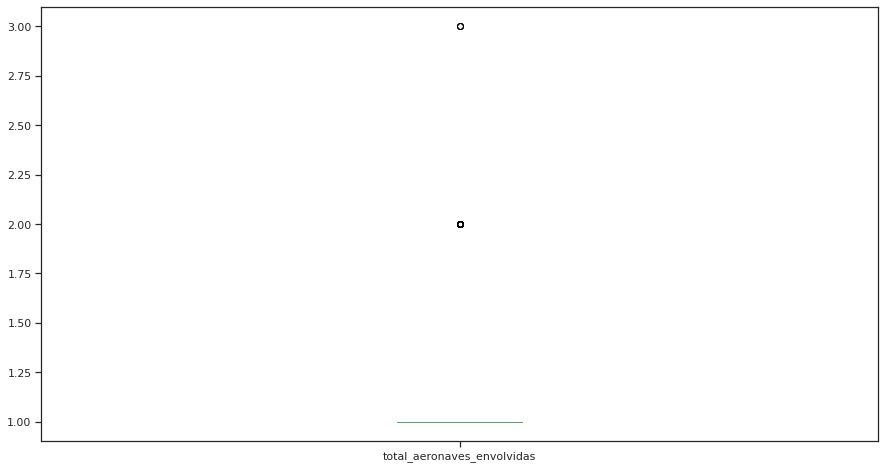

In [100]:
print(df_ocorrencia['total_aeronaves_envolvidas'].describe())
df_ocorrencia['total_aeronaves_envolvidas'].plot.box(figsize=(15,8))

Podemos perceber pelo boxplot, além dos valores dos quartis e da média, que a maior parte das ocorrência envolve apenas uma aeronave, com alguns casos envolvendo 2 ou 3 aeronaves.

### aeronave_assentos

count    5041.000000
mean       27.364213
std        54.397346
min         0.000000
25%         2.000000
50%         6.000000
75%        10.000000
max       384.000000
Name: aeronave_assentos, dtype: float64


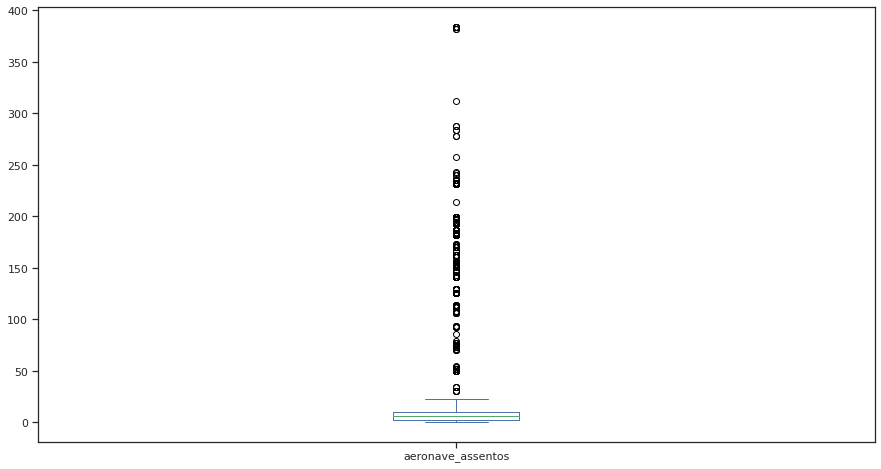

In [101]:
print(df_aeronave['aeronave_assentos'].describe())
df_aeronave['aeronave_assentos'].plot.box(figsize=(15,8))

Através do boxplot e das estatísticas descritivas, podemos dizer que ocorrências acontecem geralmente com aeronaves pequenas, no sentido de que possuem poucos assentos.

### aeronave_ano_fabricacao

In [102]:
ano_fabricacao = df_aeronave['aeronave_ano_fabricacao']

# por algum motivo, vários anos de fabricação são zero e um é 9999
ano_fabricacao.value_counts()

0.0       305
2012.0    249
2011.0    228
2010.0    225
2009.0    198
         ... 
1940.0      1
1936.0      1
1956.0      1
9999.0      1
1949.0      1
Name: aeronave_ano_fabricacao, Length: 80, dtype: int64

count    4729.000000
mean     1993.748573
std        15.796627
min      1936.000000
25%      1980.000000
50%      1996.000000
75%      2009.000000
max      2020.000000
Name: aeronave_ano_fabricacao, dtype: float64


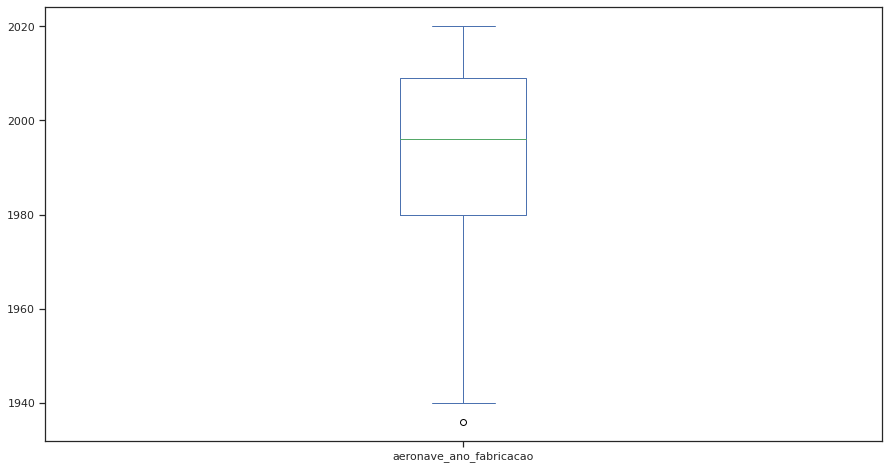

In [103]:
ano_fabricacao = ano_fabricacao[(ano_fabricacao > 0) & (ano_fabricacao < 9999)]
print(ano_fabricacao.describe())
ano_fabricacao.plot.box(figsize=(15,8))

Com essas estatísticas, podemos dizer que maior parte das aeronaves envolvida em ocorrências foi fabricada na década de 90(média=1993.748573 e mediana=1996).

### aeronave_fatalidades_total

count    5235.000000
mean        0.146705
std         0.651463
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: aeronave_fatalidades_total, dtype: float64


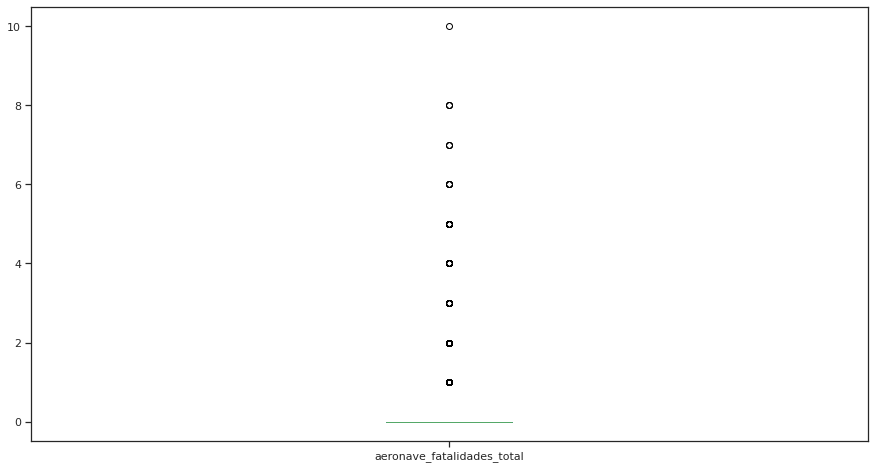

In [104]:
print(df_aeronave['aeronave_fatalidades_total'].describe())
df_aeronave['aeronave_fatalidades_total'].plot.box(figsize=(15,8))

In [105]:
n_ocorrencias_fatalidades = len(df_aeronave[df_aeronave['aeronave_fatalidades_total'] > 0]['codigo_ocorrencia'].drop_duplicates())
n_ocorrencias = len(df_aeronave['codigo_ocorrencia'].drop_duplicates())
print(f'Podemos perceber que maior parte das ocorrências não tem fatalidades. De fato, apenas {(n_ocorrencias_fatalidades/n_ocorrencias)*100:.2f}% envolvem fatalidades.')

Podemos perceber que maior parte das ocorrências não tem fatalidades. De fato, apenas 7.53% envolvem fatalidades.


# Parte 2

## Questões

### 1. Qual é o tipo de ocorrência mais comum?

Text(0, 0.5, 'Tipo de ocorrência')

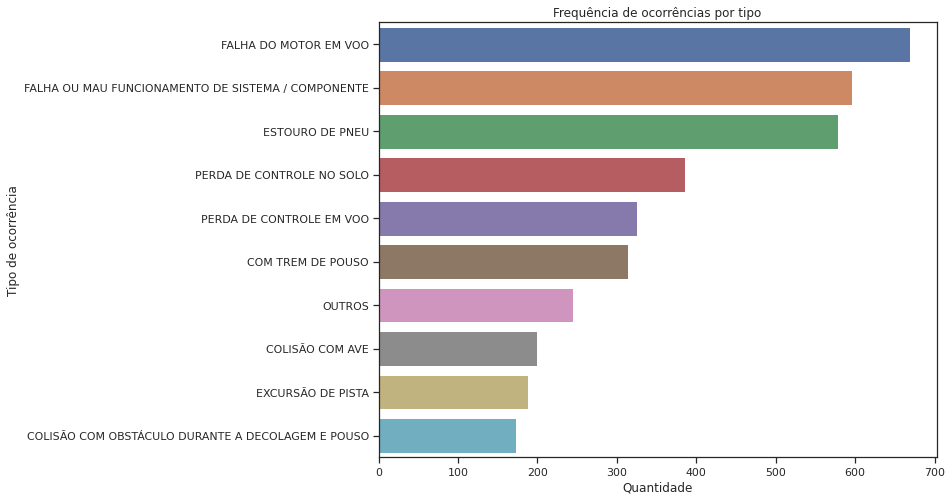

In [106]:
ocorrencia_tipo_count = df_ocorrencia_tipo["ocorrencia_tipo"].value_counts()
plt.figure(figsize=(10,8))
plt.title('Frequência de ocorrências por tipo')
ax = sns.barplot(y=ocorrencia_tipo_count[:10].index, x=ocorrencia_tipo_count[:10], orient='h')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Tipo de ocorrência')

Podemos ver que o tipo de ocorrência mais comum é a FALHA DO MOTOR EM VOO. Além disso, a FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE e o ESTOURO DE PINEU também são bastante comuns.

### 2. Que tipo de ocorrência está mais associado a fatalidades? 

Nesse caso, foi considerado apenas as ocorrências com fatalidade e então foi contado a quantidade de acordo com o tipo de ocorrência.

Text(0, 0.5, 'Tipo de ocorrência')

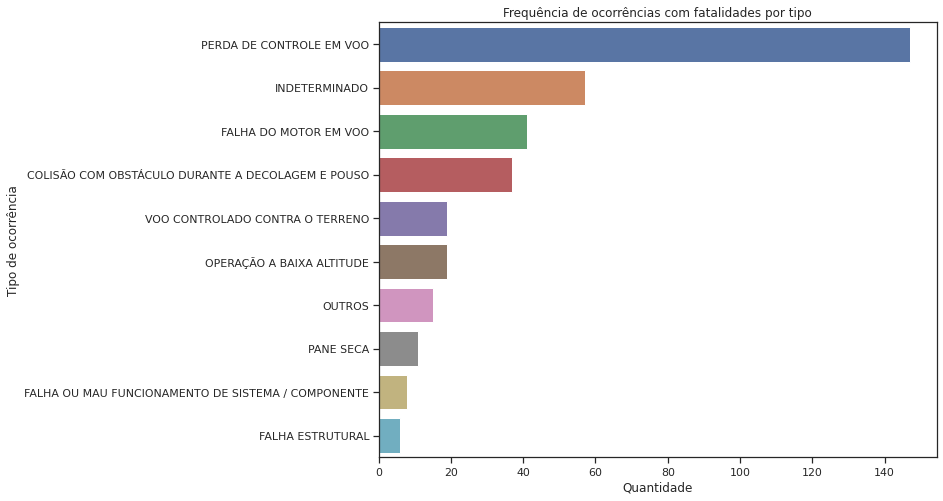

In [107]:
codigo_fatalidades = df_aeronave.loc[df_aeronave["aeronave_fatalidades_total"] > 0][
    "codigo_ocorrencia"
].drop_duplicates()

df_ocorrencia_tipo_fatal = df_ocorrencia_tipo.loc[
    df_ocorrencia_tipo["codigo_ocorrencia"].isin(codigo_fatalidades)
]

ocorrencia_tipo_fatal_count = df_ocorrencia_tipo_fatal['ocorrencia_tipo'].value_counts()
plt.figure(figsize=(10,8))
plt.title('Frequência de ocorrências com fatalidades por tipo')
ax = sns.barplot(y=ocorrencia_tipo_fatal_count[:10].index, x=ocorrencia_tipo_fatal_count[:10], orient='h')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Tipo de ocorrência')

Pelo gráfico é notável que a PERDA DE CONTROLE EM VOO é o tipo de ocorrência em que mais ocorrem fatalidades.

### 3.  O que poderia ser feito para evitar outras ocorrências?

### 4.  Existe uma relação entre a fase de operação e fatalidades?

In [108]:
df_aeronave_fatal = df_aeronave.loc[
    df_aeronave["codigo_ocorrencia"].isin(codigo_fatalidades)
]
fase_operação_fatal_count = df_aeronave_fatal['aeronave_fase_operacao'].value_counts().drop('***')
fase_operação_fatal_count

CRUZEIRO                 79
DECOLAGEM                77
MANOBRA                  56
INDETERMINADA            33
ESPECIALIZADA            25
APROXIMAÇÃO FINAL        22
VOO A BAIXA ALTURA       17
POUSO                    15
CIRCUITO DE TRÁFEGO      13
SUBIDA                   13
OUTRA FASE               10
ARREMETIDA NO AR          8
DESCIDA                   7
OPERAÇÃO DE SOLO          3
PAIRADO                   2
DESCIDA DESCONTROLADA     1
SAÍDA IFR                 1
CORRIDA APÓS POUSO        1
RETA FINAL                1
ARREMETIDA NO SOLO        1
Name: aeronave_fase_operacao, dtype: int64

In [109]:
fase_operação_count = df_aeronave['aeronave_fase_operacao'].value_counts().drop('***')
fase_operação_count

POUSO                              873
DECOLAGEM                          835
CRUZEIRO                           820
CORRIDA APÓS POUSO                 567
TÁXI                               385
SUBIDA                             376
APROXIMAÇÃO FINAL                  291
MANOBRA                            220
DESCIDA                            138
ESPECIALIZADA                      138
CIRCUITO DE TRÁFEGO                106
INDETERMINADA                       88
ESTACIONAMENTO                      71
VOO A BAIXA ALTURA                  60
OUTRA FASE                          42
ARREMETIDA NO SOLO                  36
ARREMETIDA NO AR                    28
OPERAÇÃO DE SOLO                    25
PARTIDA DO MOTOR                    19
PROCEDIMENTO DE APROXIMAÇÃO IFR     17
PAIRADO                             16
DECOLAGEM VERTICAL                  13
RETA FINAL                          11
SAÍDA IFR                            9
PUSHBACK                             8
CHEQUE DE MOTOR OU ROTOR 

In [110]:
fase_operação_fatal_count.rename('quantidade_fatal', inplace=True)
fase_operação_count.rename('quantidade_total', inplace=True)
df_fase_operacao_count = pd.concat([fase_operação_count,fase_operação_fatal_count], axis=1)

# filtrando linhas com Nan
df_fase_operacao_count.dropna(subset=['quantidade_fatal'], inplace=True)

df_fase_operacao_count['quantidade_nao_fatal'] = (fase_operação_count - fase_operação_fatal_count)
df_fase_operacao_count['proporcao'] = (fase_operação_fatal_count/fase_operação_count)
df_fase_operacao_count.sort_values(['proporcao'], ascending=False, inplace=True)
df_fase_operacao_count

,quantidade_total,quantidade_fatal,quantidade_nao_fatal,proporcao
INDETERMINADA,88,33.0,55.0,0.375000
DESCIDA DESCONTROLADA,3,1.0,2.0,0.333333
ARREMETIDA NO AR,28,8.0,20.0,0.285714
VOO A BAIXA ALTURA,60,17.0,43.0,0.283333
MANOBRA,220,56.0,164.0,0.254545
OUTRA FASE,42,10.0,32.0,0.238095
ESPECIALIZADA,138,25.0,113.0,0.181159
PAIRADO,16,2.0,14.0,0.125000
CIRCUITO DE TRÁFEGO,106,13.0,93.0,0.122642
OPERAÇÃO DE SOLO,25,3.0,22.0,0.120000


Text(0, 0.5, 'Fase de operação')

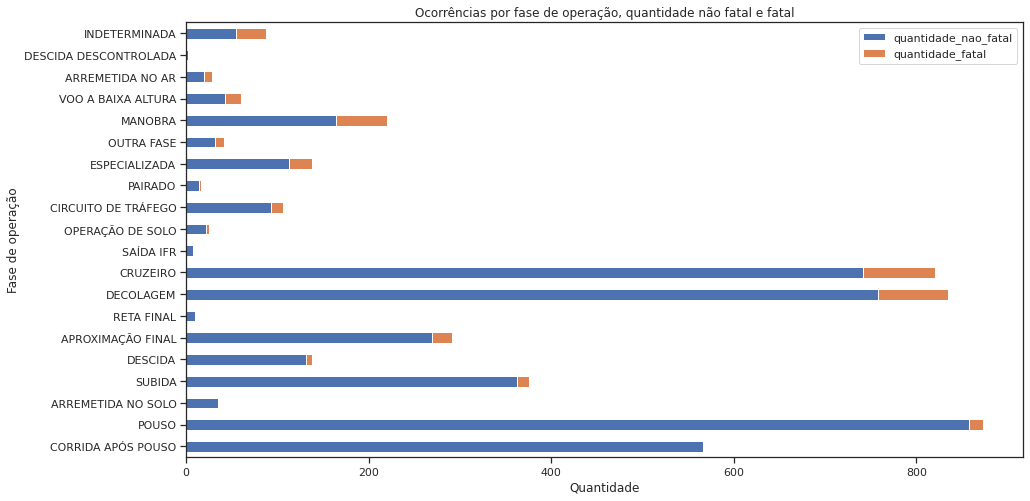

In [111]:
ax = df_fase_operacao_count[['quantidade_nao_fatal','quantidade_fatal']].plot.barh(stacked=True, figsize=(15,8), title='Ocorrências por fase de operação, quantidade não fatal e fatal')
ax.invert_yaxis()
ax.set_xlabel('Quantidade')
ax.set_ylabel('Fase de operação')

Analisando o gráfico e a tabela, percebemos que apesar de CRUZEIRO e DECOLAGEM possuírem maior quantidade de fatalidades, essa quantidade é pouca proporcionalmente. 
Além disso, as categorias com maior valor proporcional têm pouca quantidade de dados, dificultando a tomada de conclusões. Vale ressaltar também que o maior valor proporcional é INDETERMINADA, o que não ajuda em nada.
Assim, podemos dizer que não existe uma relação entre a fase de operação e fatalidades.

### 5.  Existe uma relação entre a fabricante da aeronave e o tipo de ocorrência?

Para responder a esta pergunta, considerarei apenas as fabricantes mais comums(que aparecem mais de 150 vezes) e os 5 tipos de ocorrência mais recorrentes.

In [112]:
fabricantes_count = df_aeronave['aeronave_fabricante'].value_counts()
fabricantes_count = fabricantes_count[fabricantes_count > 150].drop('***')
fabricantes_nome = fabricantes_count.index

tipos_comuns = []
for i in range(5):
    tipo_comum = ocorrencia_tipo_count.index[i]
    codigos_tipo_comum = df_ocorrencia_tipo[df_ocorrencia_tipo['ocorrencia_tipo'] == tipo_comum]['codigo_ocorrencia'].drop_duplicates()
    fabricantes_tipo_comum = df_aeronave.loc[
        (df_aeronave['codigo_ocorrencia'].isin(codigos_tipo_comum)) & (df_aeronave['aeronave_fabricante'].isin(fabricantes_nome))
    ]['aeronave_fabricante'].value_counts()
    tipos_comuns.append(fabricantes_tipo_comum.rename(tipo_comum))

df_tipos_comuns = pd.DataFrame(tipos_comuns)
df_tipos_comuns

,CESSNA AIRCRAFT,NEIVA INDUSTRIA AERONAUTICA,PIPER AIRCRAFT,EMBRAER,AEROSPATIALE AND ALENIA,BOEING COMPANY,BEECH AIRCRAFT,AIRBUS INDUSTRIE,AERO BOERO
FALHA DO MOTOR EM VOO,126.0,92.0,57.0,46.0,42.0,40.0,28.0,19.0,8.0
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,74.0,29.0,21.0,128.0,67.0,50.0,18.0,55.0,5.0
ESTOURO DE PNEU,141.0,79.0,78.0,74.0,17.0,13.0,42.0,5.0,6.0
PERDA DE CONTROLE NO SOLO,60.0,58.0,35.0,24.0,5.0,2.0,18.0,5.0,81.0
PERDA DE CONTROLE EM VOO,39.0,58.0,16.0,17.0,1.0,1.0,12.0,NaN,5.0


Text(0, 0.5, 'Tipo de ocorrência')

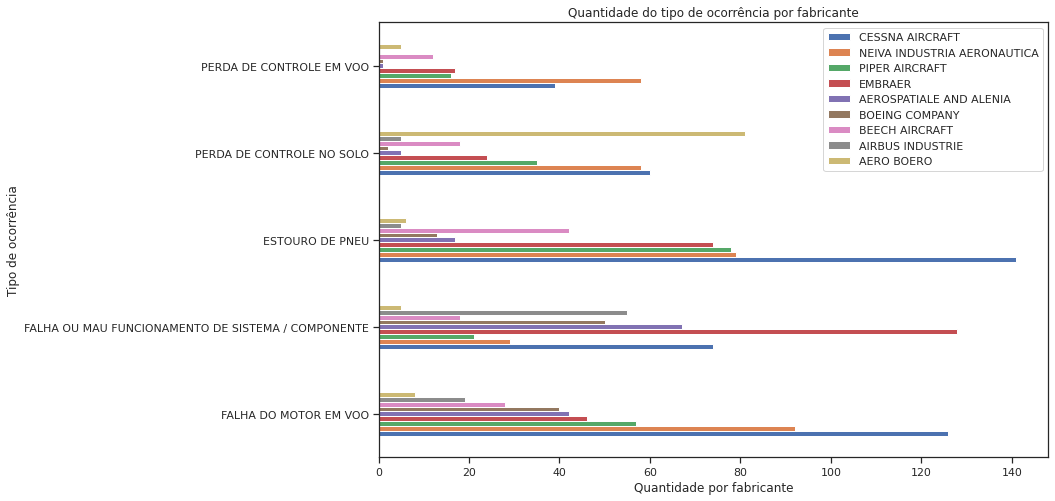

In [113]:
ax = df_tipos_comuns.plot.barh(figsize=(12,8), title='Quantidade do tipo de ocorrência por fabricante')
ax.set_xlabel('Quantidade por fabricante')
ax.set_ylabel('Tipo de ocorrência')

Observando o gráfico acima, podemos perceber que CESSNA AIRCRAFT tem consideravelmente mais casos de ESTOURO DE PINEU e FALHA DO MOTOR EM VOO, enquanto EMBRAER claramente tem mais casos de FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE.

### 6.  Existe uma relação entre o modelo da aeronave e o tipo de ocorrência? 

In [114]:
modelos_count = df_aeronave['aeronave_modelo'].value_counts()
modelos_count = modelos_count[modelos_count > 100].drop('***')
modelos_nome = modelos_count.index

tipos_comuns = []
for i in range(5):
    tipo_comum = ocorrencia_tipo_count.index[i]
    codigos_tipo_comum = df_ocorrencia_tipo[df_ocorrencia_tipo['ocorrencia_tipo'] == tipo_comum]['codigo_ocorrencia'].drop_duplicates()
    modelos_tipo_comum = df_aeronave.loc[
        (df_aeronave['codigo_ocorrencia'].isin(codigos_tipo_comum)) & (df_aeronave['aeronave_modelo'].isin(modelos_nome))
    ]['aeronave_modelo'].value_counts()
    tipos_comuns.append(modelos_tipo_comum.rename(tipo_comum))

df_tipos_comuns = pd.DataFrame(tipos_comuns)
df_tipos_comuns

,152,ATR-72-212A,EMB-810D,EMB-810C,AB-115,ERJ 190-200 IGW
FALHA DO MOTOR EM VOO,31.0,31.0,15.0,9.0,8.0,5.0
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,16.0,62.0,6.0,3.0,4.0,76.0
ESTOURO DE PNEU,35.0,11.0,52.0,35.0,6.0,NaN
PERDA DE CONTROLE NO SOLO,12.0,4.0,5.0,5.0,72.0,NaN
PERDA DE CONTROLE EM VOO,4.0,1.0,2.0,1.0,3.0,NaN


Text(0, 0.5, 'Tipo de ocorrência')

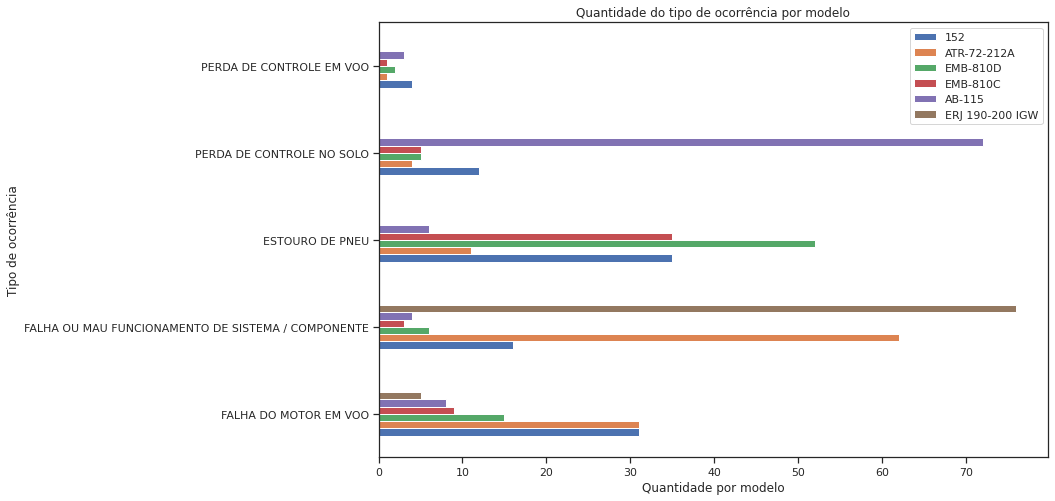

In [115]:
ax = df_tipos_comuns.plot.barh(figsize=(12,8), title='Quantidade do tipo de ocorrência por modelo')
ax.set_xlabel('Quantidade por modelo')
ax.set_ylabel('Tipo de ocorrência')

Ao analisar o barplot, é notável que o modelo AB-115 está relacionado a PERDA DE CONTROLE NO SOLO. Além disso, os modelos ATR-72-212A e ERJ 190-200 IGW apresentam maior quantidade de FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE. Já em relação aos outros tipos de ocorrência, é difícil tirar conclusões, já que a diferença entre os modelos não é tão gritante.

### 7.  Existe uma relação entre o fator contribuinte e o tipo de ocorrência? 

In [116]:
fatores_count = df_fator_contribuinte['fator_nome'].value_counts()
fatores_count = fatores_count[fatores_count > 100]
fatores_nome = fatores_count.index

tipos_comuns = []
for i in range(5):
    tipo_comum = ocorrencia_tipo_count.index[i]
    codigos_tipo_comum = df_ocorrencia_tipo[df_ocorrencia_tipo['ocorrencia_tipo'] == tipo_comum]['codigo_ocorrencia'].drop_duplicates()
    fatores_tipo_comum = df_fator_contribuinte.loc[
        (df_fator_contribuinte['codigo_ocorrencia'].isin(codigos_tipo_comum)) & (df_fator_contribuinte['fator_nome'].isin(fatores_nome))
    ]['fator_nome'].value_counts()
    tipos_comuns.append(fatores_tipo_comum.rename(tipo_comum))

df_tipos_comuns = pd.DataFrame(tipos_comuns)
df_tipos_comuns

,MANUTENÇÃO DA AERONAVE,JULGAMENTO DE PILOTAGEM,SUPERVISÃO GERENCIAL,APLICAÇÃO DE COMANDOS,ATITUDE,INDISCIPLINA DE VOO,PROCESSO DECISÓRIO,POUCA EXPERIÊNCIA DO PILOTO,PLANEJAMENTO DE VOO,PERCEPÇÃO
FALHA DO MOTOR EM VOO,89.0,49.0,40.0,27.0,18.0,15.0,14.0,13.0,8.0,2.0
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,18.0,14.0,11.0,6.0,6.0,3.0,7.0,4.0,3.0,NaN
ESTOURO DE PNEU,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN
PERDA DE CONTROLE NO SOLO,10.0,96.0,32.0,104.0,18.0,15.0,22.0,52.0,40.0,14.0
PERDA DE CONTROLE EM VOO,21.0,83.0,30.0,79.0,32.0,23.0,35.0,25.0,46.0,21.0


Text(0, 0.5, 'Tipo de ocorrência')

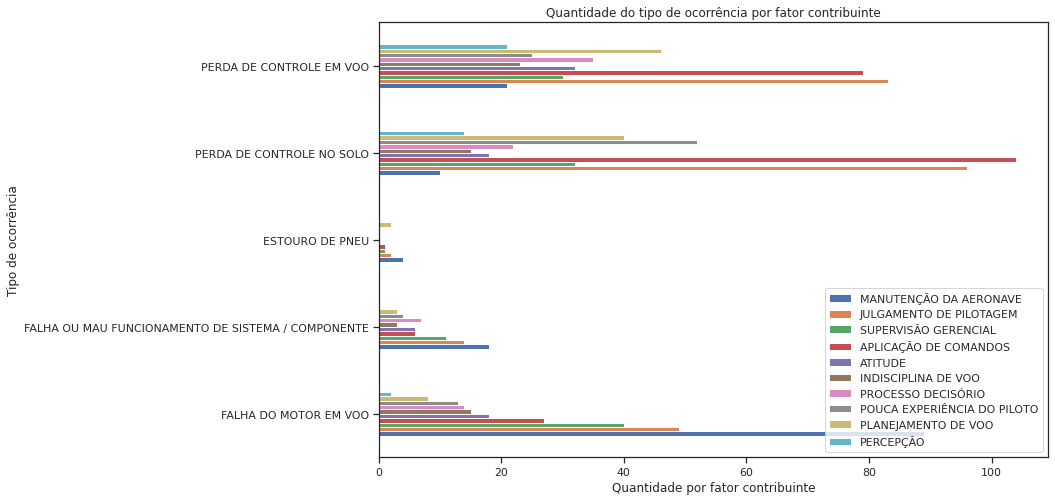

In [117]:
ax = df_tipos_comuns.plot.barh(figsize=(12,8), title='Quantidade do tipo de ocorrência por fator contribuinte')
ax.set_xlabel('Quantidade por fator contribuinte')
ax.set_ylabel('Tipo de ocorrência')

Visualmente, é possível notar que a FALHA DO MOTOR EM VOO está mais relacionada a PERCEPCAO, e a PERDA DE CONTROLE EM VOO e NO SOLO estão relacionadas ao JULGAMENTO DE PILOTAGEM e a APLICAÇÃO DE COMANDOS. Não parece haver relação para os outros tipos de ocorrência.

###(8) Existe algum componente das aeronaves que está associado com os acidentes? 

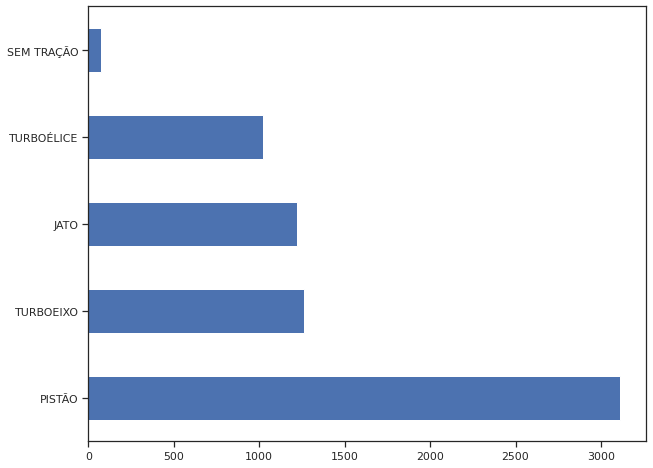

In [118]:
df_merged["aeronave_motor_tipo"].value_counts()[:10].plot.barh(figsize=(10, 8))

### (9) Existe alguma região associada com um elevado número de ocorrências?


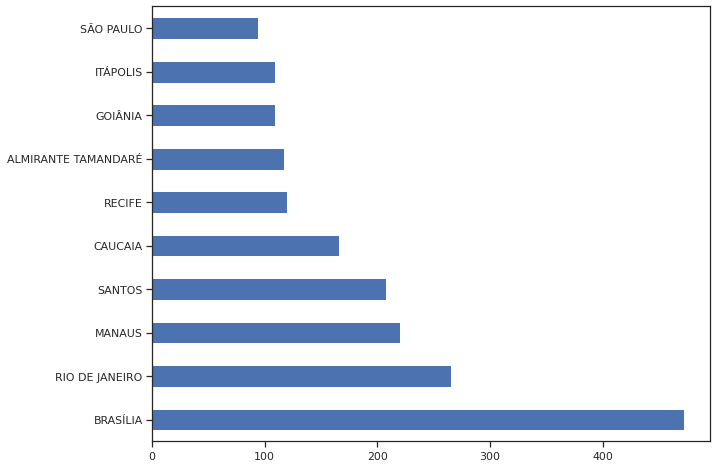

In [119]:
df_merged["ocorrencia_cidade"].value_counts()[:10].plot.barh(figsize=(10, 8))

###(10) Quais os acidentes mais frequentes por região do país?


In [120]:
uf_ocorrencias=pd.crosstab(df_merged.ocorrencia_tipo,df_merged.ocorrencia_uf).idxmax()

uf_ocorrencias

ocorrencia_uf
AC                                       POUSO SEM TREM
AL                             PERDA DE CONTROLE EM VOO
AM                                    EXCURSÃO DE PISTA
AP    FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
BA                             PERDA DE CONTROLE EM VOO
CE                                               OUTROS
DF                                    INCURSÃO EM PISTA
ES                            FOGO/FUMAÇA (SEM IMPACTO)
GO                             PERDA DE CONTROLE EM VOO
MA                             PERDA DE CONTROLE EM VOO
MG                            PERDA DE CONTROLE NO SOLO
MS                                            PANE SECA
MT                             PERDA DE CONTROLE EM VOO
PA    FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
PB                                       POUSO SEM TREM
PE                                        TRÁFEGO AÉREO
PI                                FALHA DO MOTOR EM VOO
PR                                

###(11) O horário possui relação com os acidentes?


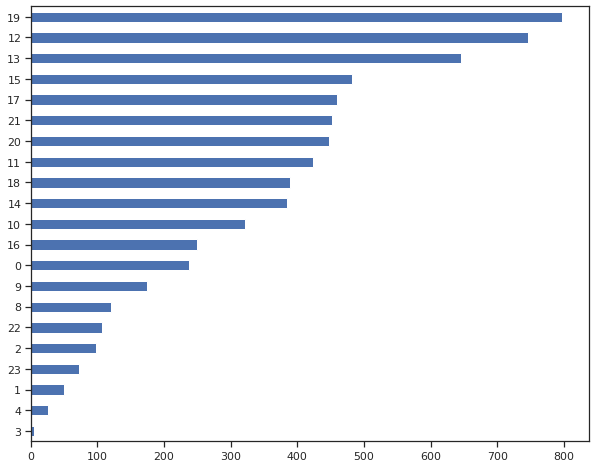

In [121]:
df_merged['ocorrencia_data'].dt.hour.value_counts().sort_values().plot.barh(figsize=(10, 8))

###(12) Qual a relação entre o tipo de aeronave e a frequência dos acidentes?

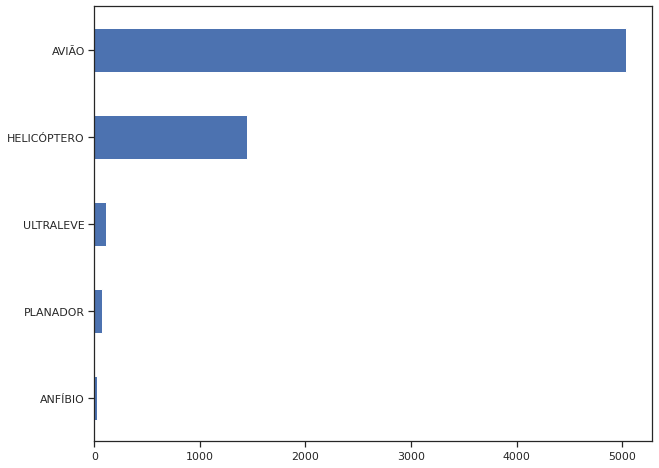

In [122]:
df_merged['aeronave_tipo_veiculo'].value_counts().sort_values().plot.barh(figsize=(10, 8))

###(13) Qual a relação entre tipo de acidente e a fatalidade? 

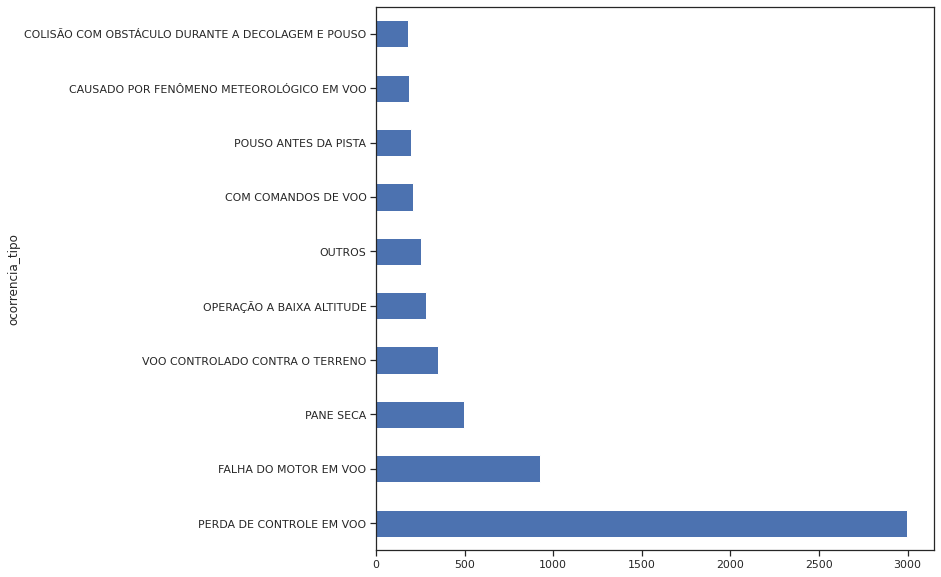

In [123]:
df_merged.groupby('ocorrencia_tipo').aeronave_fatalidades_total.sum().sort_values(ascending=False)[0:10].plot.barh(figsize=(10, 10))

### 14. Qual a frequência de acidentes em relação aos meses?

Como os dados foram coletados no periódo de 2012 a 2021 o  que totaliza 10 anos de dados.

As datas inicialmente estavam no formato object, então foram passadas para um formato de data. \
então foi criada uma coluna com o mes em que ocorreu cada acidente. \
então conta-se o numero de acidente en cada mês. \
então calcula a proporção dele em relação ao total de acidentes registrado.

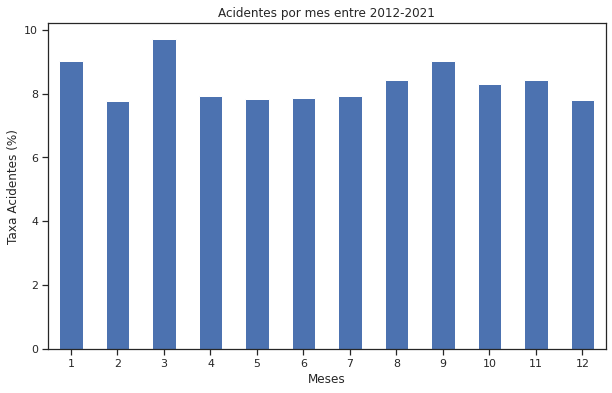

In [124]:
taxa_mes = (df_ocorrencia['mes_acidente'].value_counts() / df_ocorrencia['mes_acidente'].count() *100).sort_index()

taxa_mes.plot(kind="bar",title='Acidentes por mes entre 2012-2021',
              ylabel='Taxa Acidentes (%)', xlabel='Meses', figsize=(10, 6), rot=0)


Como pode ser observado no grafico acima, ao considera o total de acidentes do período de 2012 a 2021 para cada mês, pode-se notar que março é o mês com a maior taxa de acidentes, com quase 10%, os demais meses apresentam um valor entre 7.8% e 9%. O que demonstra que não faz muita diferença em qual mês se vai viajar de avião. 

### 15. A quantidade de acidentes aumentou o diminuiu ao longo dos anos observados?

Para esse caso, foi criada um coluna chamada ano, quem comtem o ano em que cada acidente ocorreu.\
Então conta-se a quantidade de acidentes em cada ano e gera o grafico com o comportamento do numero de acidentes ao longo dos anos.

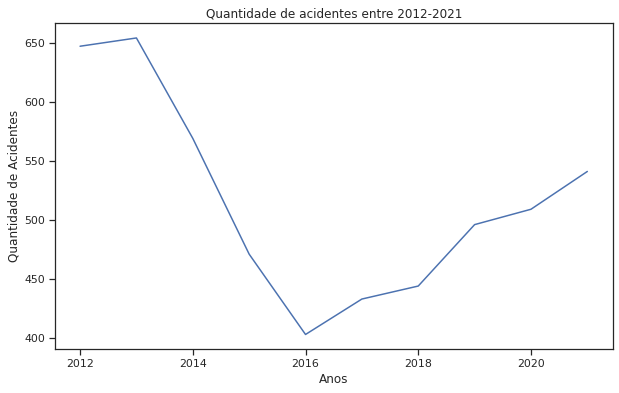

In [125]:
anos = df_ocorrencia['ano_acidente'].value_counts().sort_index()

anos.plot(title="Quantidade de acidentes entre 2012-2021",xlabel="Anos",ylabel="Quantidade de Acidentes",figsize=(10, 6), rot=0)


Como pode ser obervado no grafico acima, nos anos de 2013 a 2016 ouve uma redução no numero de acidentes aereos no brasil, entretando apartir de 2016 a quantidade de acidentes aumentou. A parte mais chama a atenção é que em 2020 e 2021, anos em que ouve a pandemia o numero de acidentes continuou a crescer, o que é meio contraintuitivo, pois era de se esperar que nesse período a quantidade de voos diminuísse e que com isso o número de acidentes também diminuísse, entretando ocorre o contrario, o número de acidente continuou a aumentar em relação aos anos anteriores.

### 16. A quantidade de fatalidades aumentou o diminuiu ao longo dos anos observados?

Para esse exercício os dados estavam em tabelas diferentes: na tabela de ocorrencias esta o ano do acidente e na tabela de aeronaves esta o numero de fatalidade de cada acidente. \
Por isso, foi necessário juntar esses dois dados das tabelas em uma mesma tabela, qtd_acidentes_anos apartir da informação que elas tem em comum, que é o código de ocorrencia. \
Apartir dessa nova tabela os dados foram agrupados por ano de acidente e foi feita a soma do número de acidentes de cada grupo.

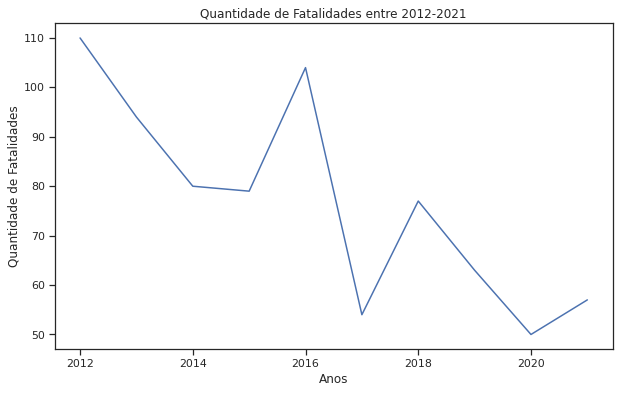

In [126]:
fatalidade_ano = pd.merge(
                          df_ocorrencia[['codigo_ocorrencia','ano_acidente']],
                          df_aeronave[['codigo_ocorrencia','aeronave_fatalidades_total']],
                          on = 'codigo_ocorrencia',
                          how= 'inner')

qtd_acidente_anos = fatalidade_ano.groupby("ano_acidente")['aeronave_fatalidades_total'].sum().sort_index()

qtd_acidente_anos.plot(title="Quantidade de Fatalidades entre 2012-2021",xlabel="Anos",ylabel="Quantidade de Fatalidades", figsize=(10, 6), rot=0)

Como pode ser observado, embora haja anos em que a quantidade de fatalidades diminua e outros em que ela aumente, a tendência geral é de queda, pelo menos no período observa, onde os picos de número de fatalidade esta cada vez mais baixo em relação ao pico anterior. No ano de 2012 o pico foi de 110, ja no pico seguinte, no ano de 2016 o valor foi de 104, e em 2018 foi de 77. O que pode indicar uma tendencia de queda   

### 17. Qual a porcentagem de acidente que possuem fatalidades?

Para esse exercício, foi primeiro gerado uma tabela que contenha apenas os registro cujo número de fatalidades tenha sido maior que zero, e então foi contado o numero de registros dessa tabela e esse valor foi salvo em total_de_fatalidades. \
Em seguida foi contado o número de acidentes registrado na tabela de aeronaves
e então claculado a porcentagem de acidentes com pelo menos uma fatalidade.

In [127]:
total_de_fatalidades = len(df_aeronave[(df_aeronave['aeronave_fatalidades_total'] > 0)].index)

total_de_acidente = len(df_aeronave.index)
porcentagem_fatalidades = round(total_de_fatalidades / total_de_acidente * 100 , 2)

print("Dos "+ str(total_de_acidente) + " acidentes registrados, "+ str(total_de_fatalidades) +
      " tiveram fatalidades, o que significa que "+ str(porcentagem_fatalidades) + "% dos acidentes tivera pelo menos uma fatalidade.")

Dos 5235 acidentes registrados, 390 tiveram fatalidades, o que significa que 7.45% dos acidentes tivera pelo menos uma fatalidade.


### 18. Qual a porcentagem de acidentes por operação particular, regular e taxi áereo?

Para esse execício, primeiro soma o total de registros. \
Então agrupa-se os registros por segmento e soma o número de registros de cada segmento. \
E calcula a porcentagem de cada segmento em relação a quantidade total de registros. 

aeronave_registro_segmento
***                         72
ADMINISTRAÇÃO DIRETA       183
ADMINISTRAÇÃO INDIRETA       5
AGRÍCOLA                   350
ESPECIALIZADA               94
EXPERIMENTAL               426
HISTÓRICA                    1
INSTRUÇÃO                  704
MÚLTIPLA                    32
NÃO REGULAR                 29
PARTICULAR                1654
REGULAR                   1055
TÁXI AÉREO                 630
Name: aeronave_fatalidades_total, dtype: int64


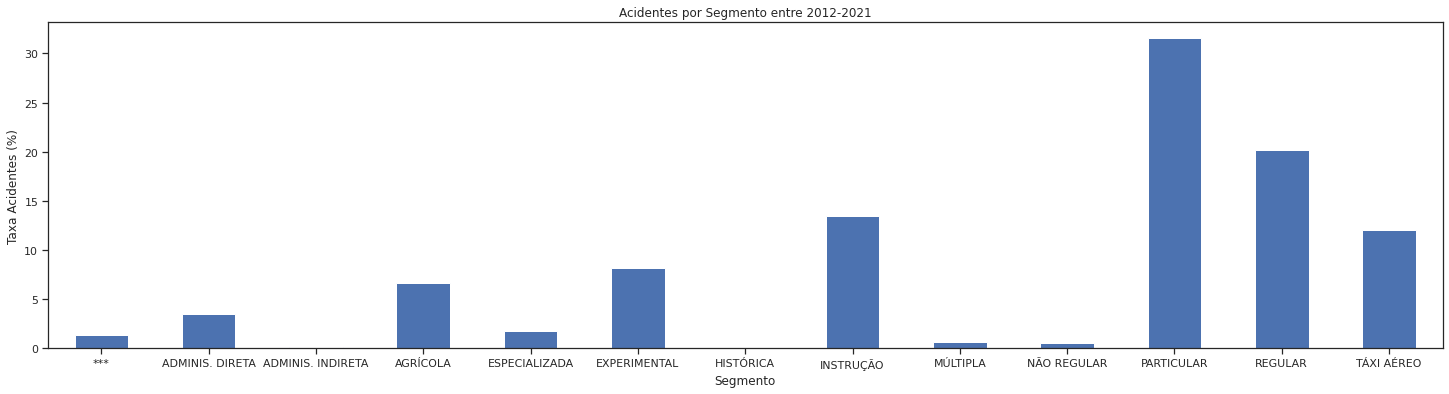

In [128]:
total_registros = len(df_aeronave)

registros_segmento = df_aeronave.groupby("aeronave_registro_segmento")['aeronave_fatalidades_total'].count()
print(registros_segmento)
registros_segmento = registros_segmento.rename(index={"ADMINISTRAÇÃO DIRETA": "ADMINIS. DIRETA", "ADMINISTRAÇÃO INDIRETA": "ADMINIS. INDIRETA"})
taxa_fatalidade_segmento =  registros_segmento / total_registros * 100


taxa_fatalidade_segmento.plot(kind="bar",title='Acidentes por Segmento entre 2012-2021',
                             ylabel='Taxa Acidentes (%)', xlabel='Segmento', figsize=(25, 6), rot=0)

Pelo grafico acima, da para notar que os voos particulares, Regulares e instrução e táxi aéreo, são os que tem a maior taxa de acidentes com fatalidades. \
Observa-se também que o segmento de táxi aéreo que são voos em as pessoas alugam o veiculo, possue uma taxa de acidentes muito baixa quando comparada com os voos particulares, embora a quantidade de voos particulares registrado seja mais que o dobro do numero de voos registrados para táxi aéreo.


### 19. Qual as fases de operação com maior taxa de acidentes?

Para esse exercício, primeiro foi calculado o total de registros. \
Em seguida os dados foram agrupados por fase de operação e contado a quantidade de registros em cada fase. \
Então calculou a taxa de acidente de cada fase em relação ao total de registros.

Text(0.5, 1.0, 'Taxa de Acidentes em relação a Fase de Operação')

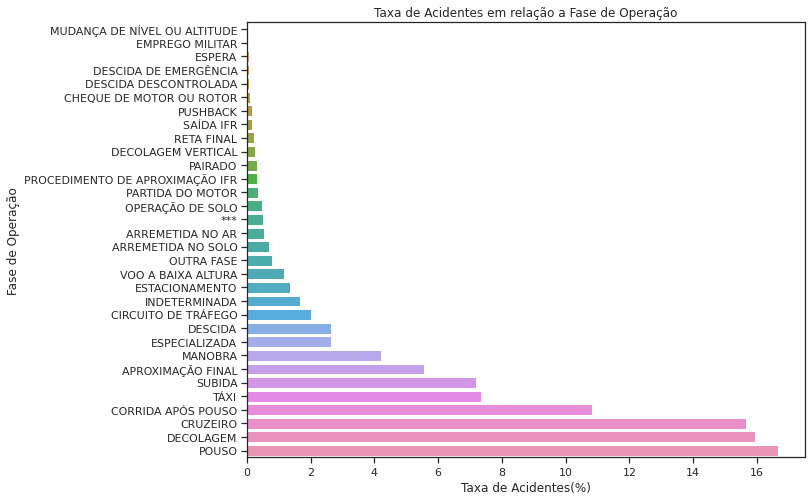

In [129]:
total_registros = len(df_aeronave)
registros_operacao = df_aeronave.groupby("aeronave_fase_operacao")['codigo_ocorrencia'].count().sort_values()
porcentagem_acidentes_opereacao = round(registros_operacao / total_registros * 100, 2)


plt.figure(figsize=(10,8))
ax = sns.barplot(y=porcentagem_acidentes_opereacao.index, x=porcentagem_acidentes_opereacao, orient='h')
ax.set_xlabel('Taxa de Acidentes(%)')
ax.set_ylabel('Fase de Operação')
ax.set_title('Taxa de Acidentes em relação a Fase de Operação')

Como pode ser observado no grafico, a maior parte dos acidentes, um pouco mais de 31% deles ocorram durante a decolagem e puoso, enquanto que aproximadamente 15% durante a fase de cruzeiro, que corresponde ao final da decolagem e inicio da pouso.

### 20. Qual a taxa de acidentes em relação ao ano de fabricação das aeronaves?

Para esse exercício, foi preciso filtrar a tabela para evitar alguns dados estranhos, pois havia aeronaves com ano de fabricação igual a 0 e outras com ano de fabricação igual a 9999, a filtragem foi para deixar apenas os registro entre 1900 e 2100. \
Em seguida foi contado o numero de registros dentro desse intervalo de anos. \
Então os dados foram agrupados pelo ano de fabricação e em seguida foi calculado a taxa de acidente para cada ano de fabricação. 

Text(0, 0.5, 'Taxa de Acidentes (%)')

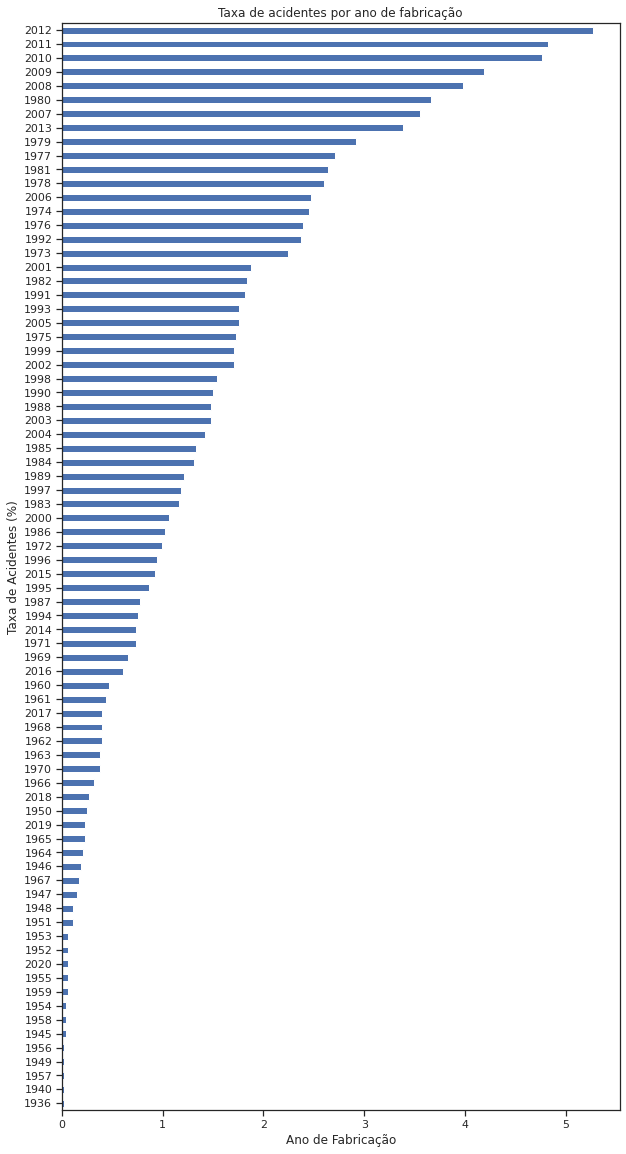

In [130]:
Registros = df_aeronave[(df_aeronave['aeronave_ano_fabricacao'] > 1900) & (df_aeronave['aeronave_ano_fabricacao'] < 2100)]
Registros = Registros.astype({'aeronave_ano_fabricacao': int})

total_registros = Registros['aeronave_ano_fabricacao'].count()

registros_operacao = Registros.groupby("aeronave_ano_fabricacao")['codigo_ocorrencia'].count()

porcentagem_ano_fabricacao = round(registros_operacao / total_registros * 100, 2).sort_values()


ax = porcentagem_ano_fabricacao.plot(kind="barh",title='Taxa de acidentes por ano de fabricação',
                                     figsize=(10, 20))
ax.set_xlabel('Ano de Fabricação')
ax.set_ylabel('Taxa de Acidentes (%)')

Como pode ser observado no grafico acima, os modelos fabricados nos anos de 2012, 2011 e 2010 são os anos de fabricação com a maior taxa de aeronaves envolvidas em acidentes. \
Pode observar também que modelos mais antigos possuem uma menor taxa de acidente. \
Emquanto que modelos fabricados entre 2017 e 2020 também apresentam uma baixa taxa de acidentes. \
Isso pode ser causado pela pouca circulaçaõ de modelo muito antigo, já que ha modelos mais novos disponiveis no mercado, e que modelos muito novos como os de 2017 e 2020 podem apresentar um preço mais elevado que modelo que ja estão no mercado a mais tempo como  os de 2012 e 2011. O que poderia justificar os modelos de 2010 a 2012 apresentarem uma maior taxa de acidentes, pois há mais aeronaves deses anos em circulação.


# Parte 3

O objetivo dessa parte do trabalho é tentar prever se um acidente tera ou não fatalidade, com base nas caracteristicas do voo. 

In [131]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

Fazemos uma copia dos dados no df_merge para podermos fazer as modificações sem afetar o que foi feito na parte anterior. \
E verificamos se tem algum dado que esteja faltando alguma informação.

In [132]:
dataset = df_merged
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6687 entries, 0 to 6686
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   codigo_ocorrencia                6687 non-null   int64         
 1   ocorrencia_classificacao         6687 non-null   object        
 2   ocorrencia_latitude              6687 non-null   object        
 3   ocorrencia_longitude             6687 non-null   object        
 4   ocorrencia_cidade                6687 non-null   object        
 5   ocorrencia_uf                    6687 non-null   object        
 6   ocorrencia_pais                  6687 non-null   object        
 7   ocorrencia_aerodromo             6687 non-null   object        
 8   ocorrencia_dia                   6687 non-null   object        
 9   ocorrencia_hora                  6687 non-null   object        
 10  investigacao_aeronave_liberada   6687 non-null   object     

## Visualizaçaõ do DataSet

Criamos a coluna fatal que representará as classes. \
fatal igual a 0 quando não houver fatalidade \
fatal igual a 1 quando houver uma ou mais fatalidades.

In [133]:
dataset['fatal'] = dataset['aeronave_fatalidades_total'].apply(lambda x: 1 if x > 0 else 0)
dataset[['aeronave_fatalidades_total', 'fatal']]

,aeronave_fatalidades_total,fatal
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6682,0,0
6683,0,0
6684,0,0
6685,1,1


In [134]:
dataset

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_data,fatal
0,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2012-01-06 13:44:00,0
1,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2012-01-06 13:44:00,0
2,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,A-582/CENIPA/2014 - 03,2016-07-29,2016-08-25,2016-12-20,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO,2012-01-06 13:44:00,0
3,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2012-01-06 13:44:00,0
4,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2012-01-06 13:44:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,79713,ACIDENTE,-33.176944,-53.014167,SANTA VITÓRIA DO PALMAR,RS,BRASIL,SDCD,06/12/2020,13:15:00,...,A-146/CENIPA/2020 - 01,2021-07-08,2021-07-26,2021-08-30,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2020-12-06 13:15:00,0
6683,79713,ACIDENTE,-33.176944,-53.014167,SANTA VITÓRIA DO PALMAR,RS,BRASIL,SDCD,06/12/2020,13:15:00,...,A-146/CENIPA/2020 - 02,2021-07-08,2021-07-26,2021-08-30,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2020-12-06 13:15:00,0
6684,79713,ACIDENTE,-33.176944,-53.014167,SANTA VITÓRIA DO PALMAR,RS,BRASIL,SDCD,06/12/2020,13:15:00,...,A-146/CENIPA/2020 - 03,2021-07-08,2021-07-26,2021-08-30,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2020-12-06 13:15:00,0
6685,80073,ACIDENTE,-10.98472,-37.05166,ARACAJU,SE,BRASIL,SDCD,06/05/2021,14:57:00,...,A-063/CENIPA/2021 - 01,2021-11-12,2021-11-19,2021-08-30,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2021-05-06 14:57:00,1


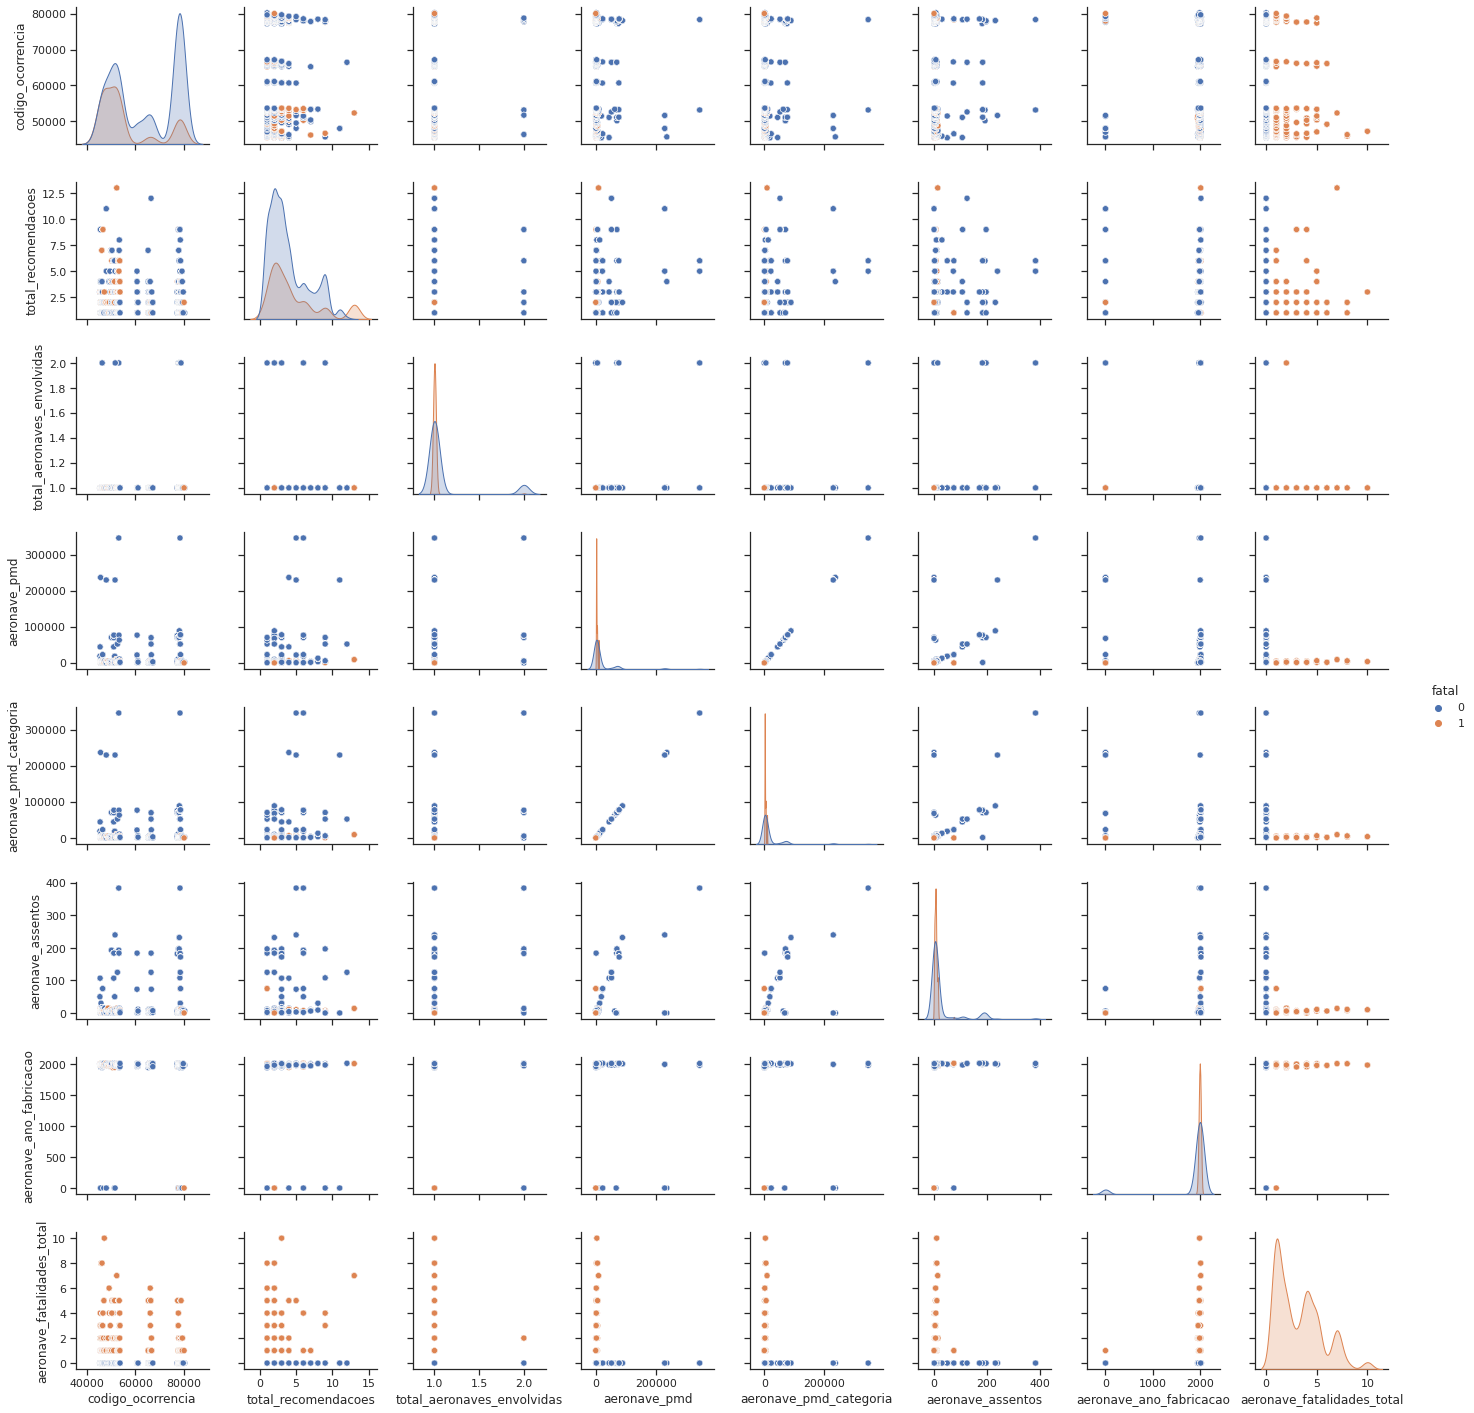

In [135]:
sns.set(style='ticks')
sns.pairplot(dataset, hue='fatal')
plt.show()

## Escolha das colunas que serão usadas para treino.

### Removemos primeiro as colunas que pareciam ser menos relevantes.

In [136]:
# A coluna do codigo_ocorrencia nçao é relevante então iremos remove-la
dataset = dataset.drop(columns=['codigo_ocorrencia'])

In [137]:
# Como na coluna ocorrencia_pais so tem o brasil, iremos remover essa coluna.
print(dataset['ocorrencia_pais'].value_counts())
dataset = dataset.drop(columns=['ocorrencia_pais'])

BRASIL    6687
Name: ocorrencia_pais, dtype: int64


In [138]:
# Como as recomendações não são necessarias iremos remover todas as colunas de recomendação.
dataset = dataset.drop(columns=['recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback',
                                'recomendacao_conteudo', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'recomendacao_destinatario'])

In [139]:
# São os atributos relacionados a investigação dos acidentes.
dataset = dataset.drop(columns=['investigacao_aeronave_liberada','investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado',
                                'divulgacao_dia_publicacao', 'total_recomendacoes'])

In [140]:
# Como já tem a coluna com os tipos de ocorrencia esssa coluna pare redundante
dataset = dataset.drop(columns=['ocorrencia_tipo_categoria'])

In [141]:
# como a classe se teve ou não fatalidade foi definido com base nela, mante-la é quase como manter a classe.
dataset = dataset.drop(columns=['aeronave_fatalidades_total'])

In [142]:
# A coluna ocorrencia_data é a junção de duas outras colunas, a coluna data e hora.
dataset = dataset.drop(columns=['ocorrencia_data'])

In [143]:
# Como o numero que representa o pmd da categoria é o mesmo numero usado para falar o pmd da aeronave, vamos manter apenas o pmd categoria.
print(dataset[['aeronave_pmd', 'aeronave_pmd_categoria']])
dataset = dataset.drop(columns=['aeronave_pmd'])

      aeronave_pmd  aeronave_pmd_categoria
0            18600                   18600
1            18600                   18600
2            18600                   18600
3            18600                   18600
4            18600                   18600
...            ...                     ...
6682          1800                    1800
6683          1800                    1800
6684          1800                    1800
6685             0                       0
6686             0                       0

[6687 rows x 2 columns]


In [144]:
# Com base na questão 20. Qual a taxa de acidentes em relação ao ano de fabricação das aeronaves?
# Decidimos que seria melhor remover esse atributo, pois no dataset o ano de fabricação não tem muito aver com a chance de acidente,
# nesse caso o motivo da taxa de acidentes ser baixo em aeronaves muito antiga e muito nova se dá mais pela pouca quantidade em uso do que 
# pelo ano de fabricação representar uma menor taxa de acidentes, pois seria contraintuitivo uma aeronave de 1957 ser mais segura que uma de 2020.
dataset = dataset.drop(columns=['aeronave_ano_fabricacao'])

In [145]:
# A maioria das aeronaves foram feitas no brasil
print(dataset['aeronave_pais_registro'].value_counts())
dataset = dataset.drop(columns=['aeronave_pais_registro'])

BRASIL              6431
PORTUGAL             108
NÃO IDENTIFICADO      93
EMIRADOS ÁRABES       36
ESTADOS UNIDOS        14
ESPANHA                4
URUGUAI                1
Name: aeronave_pais_registro, dtype: int64


In [146]:
# Leandro   RESOLVA
dataset = dataset.drop(columns=['ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_dia', 'ocorrencia_hora', 'total_aeronaves_envolvidas',
                                'aeronave_matricula', 'aeronave_pais_fabricante'])

### Analise das colunas que parecem mais relevantes

In [147]:
dataset['ocorrencia_classificacao'] = dataset["ocorrencia_classificacao"].astype('category').cat.codes
dataset['ocorrencia_cidade'] = dataset["ocorrencia_cidade"].astype('category').cat.codes
dataset['ocorrencia_uf'] = dataset["ocorrencia_uf"].astype('category').cat.codes
dataset['ocorrencia_aerodromo'] = dataset["ocorrencia_aerodromo"].astype('category').cat.codes
dataset['ocorrencia_saida_pista'] = dataset['ocorrencia_saida_pista'].apply(lambda x: 1 if x == 'SIM' else 0)
dataset['ocorrencia_aerodromo'] = dataset["ocorrencia_aerodromo"].astype('category').cat.codes

dataset = pd.get_dummies(dataset, columns=["aeronave_operador_categoria"])
dataset = pd.get_dummies(dataset, columns=["aeronave_tipo_veiculo"])
dataset['aeronave_fabricante'] = dataset["aeronave_fabricante"].astype('category').cat.codes
dataset['aeronave_modelo'] = dataset["aeronave_modelo"].astype('category').cat.codes
dataset['aeronave_tipo_icao'] = dataset["aeronave_tipo_icao"].astype('category').cat.codes
dataset['aeronave_motor_tipo'] = dataset["aeronave_motor_tipo"].astype('category').cat.codes
dataset = pd.get_dummies(dataset, columns=["aeronave_motor_quantidade"])
dataset['aeronave_motor_tipo'] = dataset["aeronave_motor_tipo"].astype('category').cat.codes
dataset['aeronave_registro_categoria'] = dataset["aeronave_registro_categoria"].astype('category').cat.codes
dataset['aeronave_registro_segmento'] = dataset["aeronave_registro_segmento"].astype('category').cat.codes
dataset['aeronave_voo_origem'] = dataset["aeronave_voo_origem"].astype('category').cat.codes
dataset['aeronave_voo_destino'] = dataset["aeronave_voo_destino"].astype('category').cat.codes
dataset['aeronave_fase_operacao'] = dataset["aeronave_fase_operacao"].astype('category').cat.codes
dataset['aeronave_tipo_operacao'] = dataset["aeronave_tipo_operacao"].astype('category').cat.codes
dataset = pd.get_dummies(dataset, columns=["aeronave_nivel_dano"])
dataset['ocorrencia_tipo'] = dataset["ocorrencia_tipo"].astype('category').cat.codes
dataset['taxonomia_tipo_icao'] = dataset["taxonomia_tipo_icao"].astype('category').cat.codes
dataset['fator_nome'] = dataset["fator_nome"].astype('category').cat.codes

dataset['fator_aspecto'] = dataset["fator_aspecto"].astype('category').cat.codes
dataset['fator_condicionante'] = dataset["fator_condicionante"].astype('category').cat.codes
dataset['fator_area'] = dataset["fator_area"].astype('category').cat.codes

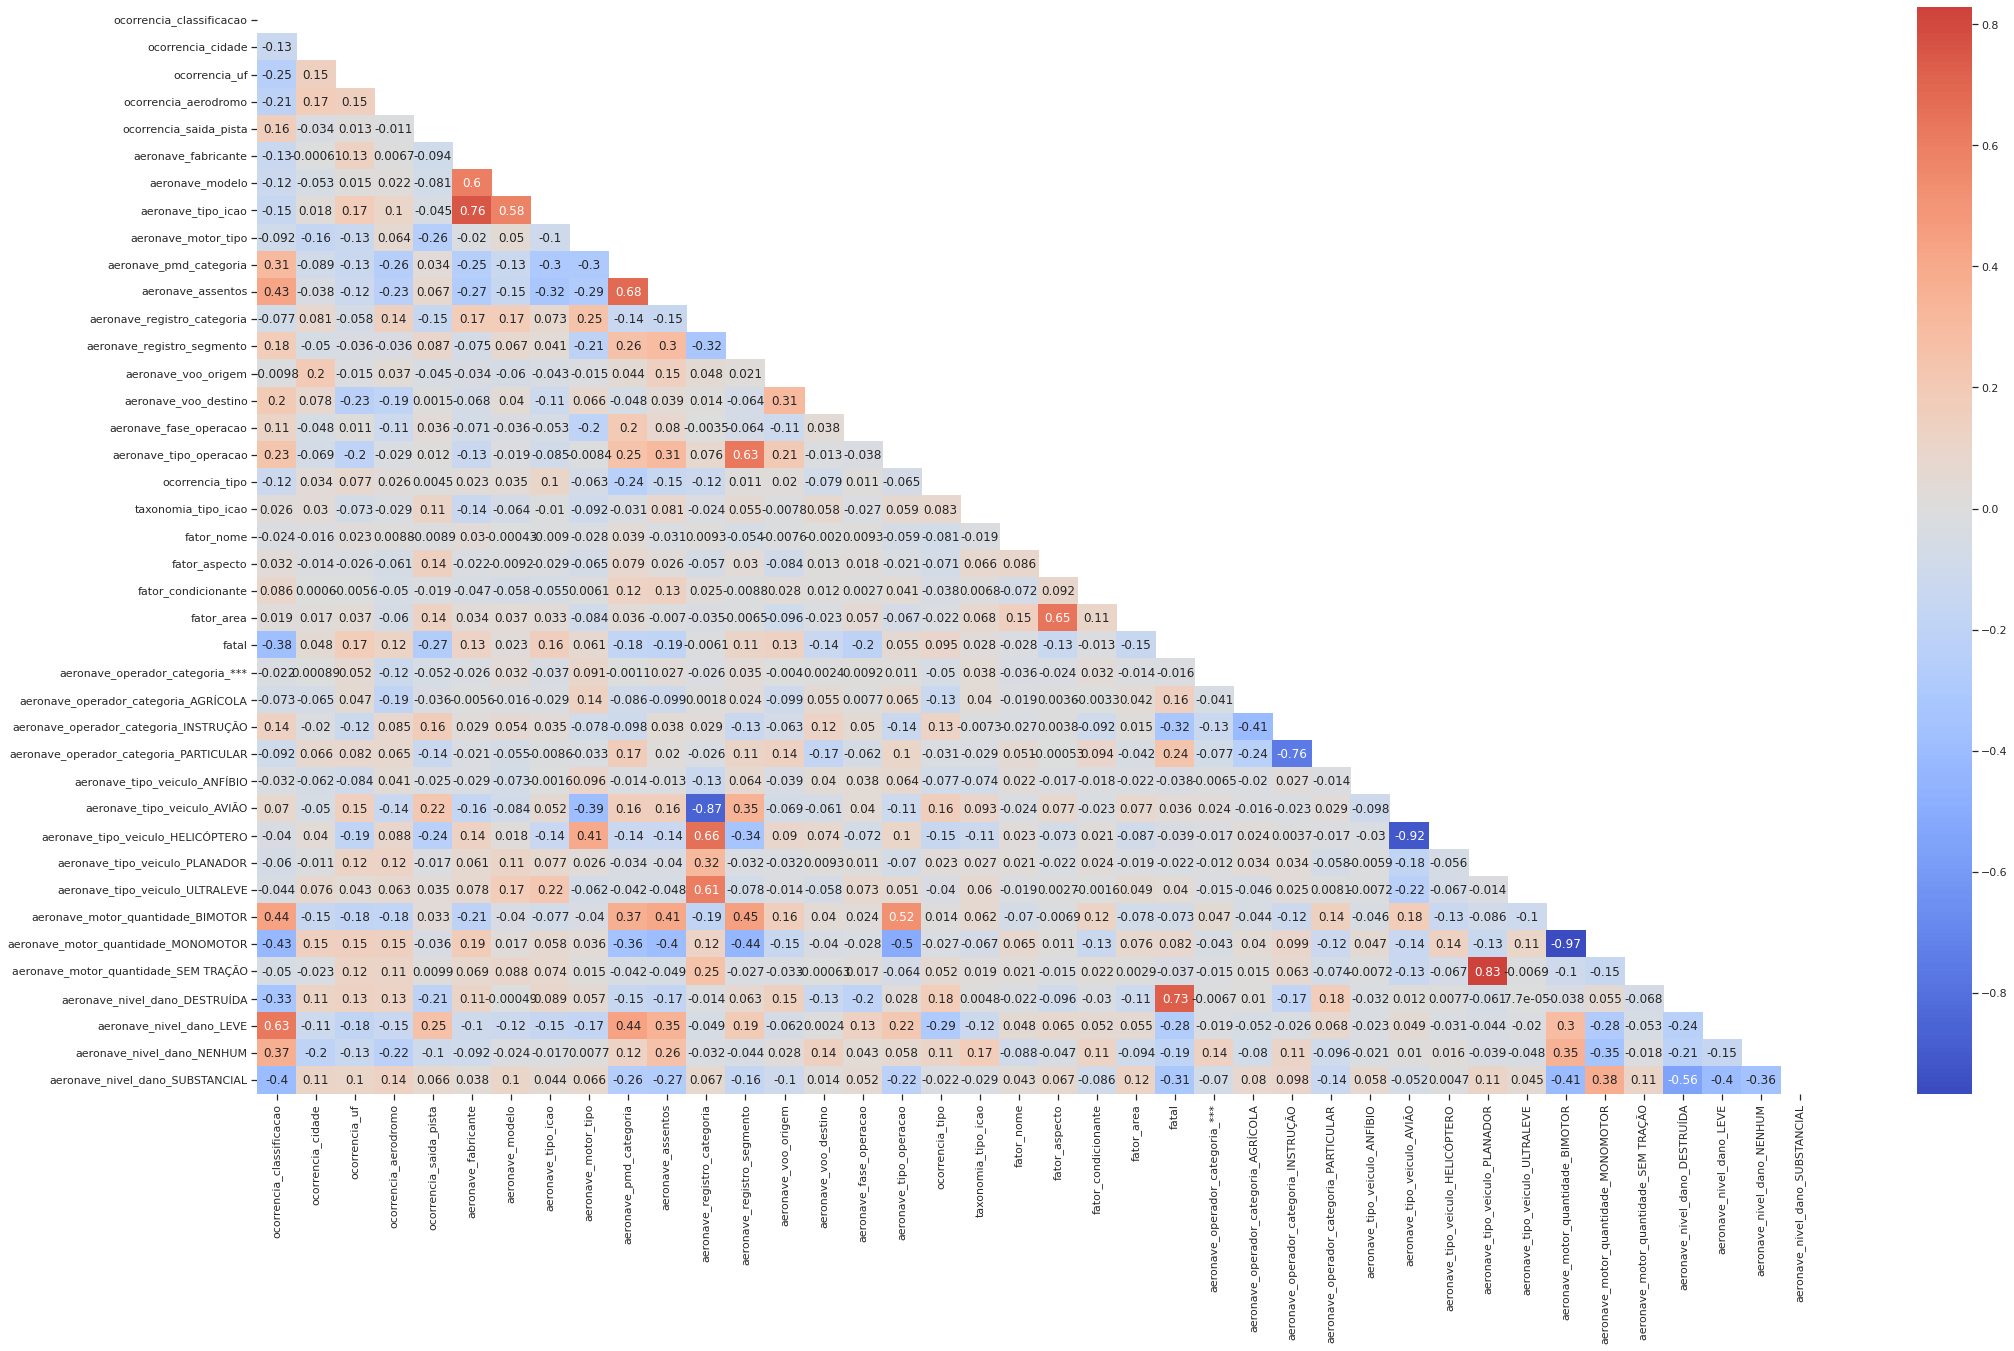

In [148]:
Var_Corr = dataset.corr()
matrix = np.triu(dataset.corr())

plt.figure(figsize = (35,20))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

In [149]:
# Variavel de interese maiores que 0.3 e menores que -0.3.
cols_interesse = ['ocorrencia_classificacao', 'aeronave_nivel_dano_SUBSTANCIAL', 'aeronave_nivel_dano_DESTRUÍDA', 'aeronave_operador_categoria_INSTRUÇÃO']
target = 'fatal'

In [150]:
# Variavel de interese maiores que 0.2 e menores que -0.2.
cols_interesse_2 = ['ocorrencia_classificacao', 'aeronave_nivel_dano_SUBSTANCIAL', 'aeronave_nivel_dano_DESTRUÍDA', 
                    'aeronave_operador_categoria_INSTRUÇÃO','ocorrencia_saida_pista', 'aeronave_fase_operacao', 'aeronave_nivel_dano_LEVE',
                    'aeronave_operador_categoria_PARTICULAR']

In [151]:
# Variavel de interese maiores que 0.1 e menores que -0.1.
cols_interesse_3 = ['ocorrencia_classificacao', 'aeronave_nivel_dano_SUBSTANCIAL', 'aeronave_nivel_dano_DESTRUÍDA', 
                    'aeronave_operador_categoria_INSTRUÇÃO','ocorrencia_saida_pista', 'aeronave_fase_operacao', 'aeronave_nivel_dano_LEVE',
                    'aeronave_operador_categoria_PARTICULAR', 'ocorrencia_uf', 'ocorrencia_aerodromo', 'aeronave_fabricante',
                    'aeronave_tipo_icao', 'aeronave_pmd_categoria', 'aeronave_voo_origem', 'aeronave_voo_destino', 'fator_aspecto',
                    'fator_area', 'aeronave_nivel_dano_NENHUM', 'aeronave_operador_categoria_AGRÍCOLA']

A gente pensou em testar 3 grupos de interese, pra ver qual ia ser melhor.

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def classifier(X_train,X_test,Y_train,Y_test):
    #Aplicando KNN
    print(" KNN ")
    ini = time.time() #Inicio do calculo do tempo

    knn=KNeighborsClassifier()
    knn.fit(X_train,Y_train)

    end = time.time()
    knn_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,knn.predict(X_test)))
    print(confusion_matrix(Y_test, knn.predict(X_test)))
    print()
    
    #Aplicando Arvore de Decisao
    print("Árvore de Decisão")
    ini = time.time() #Inicio do calculo do tempo

    dtc=tree.DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)

    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))
    print(confusion_matrix(Y_test, dtc.predict(X_test)))

Y = dataset[target]

### Grupo 1

In [154]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset[cols_interesse],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       891
           1       0.69      0.96      0.80       447

    accuracy                           0.84      1338
   macro avg       0.83      0.87      0.84      1338
weighted avg       0.88      0.84      0.85      1338

[[700 191]
 [ 20 427]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       891
           1       0.87      0.74      0.80       447

    accuracy                           0.88      1338
   macro avg       0.87      0.84      0.85      1338
weighted avg       0.88      0.88      0.87      1338

[[841  50]
 [116 331]]


###Grupo 2

In [155]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset[cols_interesse_2],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       891
           1       0.94      0.90      0.92       447

    accuracy                           0.95      1338
   macro avg       0.94      0.93      0.94      1338
weighted avg       0.95      0.95      0.95      1338

[[864  27]
 [ 46 401]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       891
           1       0.93      0.91      0.92       447

    accuracy                           0.95      1338
   macro avg       0.94      0.94      0.94      1338
weighted avg       0.95      0.95      0.95      1338

[[860  31]
 [ 39 408]]


###Grupo 3

In [156]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset[cols_interesse_2],Y,test_size=0.2, random_state=0)
classifier(X_train,X_test,Y_train,Y_test)

 KNN 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       891
           1       0.94      0.90      0.92       447

    accuracy                           0.95      1338
   macro avg       0.94      0.93      0.94      1338
weighted avg       0.95      0.95      0.95      1338

[[864  27]
 [ 46 401]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       891
           1       0.93      0.91      0.92       447

    accuracy                           0.95      1338
   macro avg       0.94      0.94      0.94      1338
weighted avg       0.95      0.95      0.95      1338

[[860  31]
 [ 39 408]]
